In [29]:
# libraries
options(repr.plot.width=4, repr.plot.height=4)
library(rethinking)

# Q1
- The weights listed below were recorded in the !Kung census, but heights
were not recorded for these individuals.
- Provide predicted heights and 89%
compatibility intervals for each of these individuals.
- That is, fill in the table
below, using model-based predictions.

### Model

In [30]:
# We want to predict height using weight.(model)
# Individual | weight | expected height | 89% interval<p>
#      1     | 45
#      2     | 40
#      3     | 65
#      4     | 31
#      5     | 53

data(Howell1)
d <- Howell1

# Standardize data
std.d <- data.frame(scale(d))
# attributes(scale(d))

# data is at the individual level.
flist <- alist(
    height ~ dnorm( mu, sigma ),
    mu <- a + b1*weight ,
    a ~ dnorm(0,1),
    b1 ~ dlnorm(0,1),
    sigma ~ dlnorm(0,1)
)
model <- quap(flist = flist, data =list(height=std.d$height,
                                        weight=std.d$weight))
model


Quadratic approximate posterior distribution

Formula:
height ~ dnorm(mu, sigma)
mu <- a + b1 * weight
a ~ dnorm(0, 1)
b1 ~ dlnorm(0, 1)
sigma ~ dlnorm(0, 1)

Posterior means:
            a            b1         sigma 
-4.402507e-07  9.406114e-01  3.386137e-01 

Log-likelihood: -182.77 

### Prediction

In [49]:
# What I want to predict
d.pred <- data.frame(
    weight = c(45,40,65,31,53)
)
# Convert weights to z-score because data was standardized
z.score <- function(x) {(x - 35.6106175924632)/27.6024476405647}
# z.score(d.pred$weight)
# 0.340164848052754 0.159021492031965 1.06473827213591 -0.167036548805455 0.629994217686017

# Uncertainty around parameter mu
height.posterior <- link(fit = model,data=list(weight=z.score(d.pred$weight)))

# Uncertainty around sampling (predictions)
sim.height <- sim( model , data = list(weight=z.score(d.pred$weight)) )
# extract.samples(model) # parameters

# Since we standardized before the modeling we now reverse the standardization.
# also we use the mu and sd of the target variable (height)

# Unstandardized height
rev.z.score <- function(x) {(138.263596323529)+x*(20.746888222142)}

# Height Predictions are.. 
d.pred$mu <- apply( rev.z.score(sim.height) , 2 , mean)
d.pred$Lower89 <- apply( rev.z.score(sim.height) , 2 , PI,  prob=0.89 )[1,]
d.pred$Upperr89 <- apply( rev.z.score(sim.height) , 2 , PI,  prob=0.89 )[2,]
round(d.pred,1)

weight,mu,Lower89,Upperr89
45,144.9,133.4,156.1
40,141.0,130.3,152.7
65,159.0,148.1,169.7
31,135.0,124.3,146.3
53,150.2,138.6,161.4


### Plot

In [37]:
# Plots
plot( individual ~ height , list(
    height = rev.z.score(apply( sim.height , 2 , mean, prob=0.89 )),
    individual = c(1,2,3,4,5)
) , col=col.alpha(rangi2,1), xlim=c(120,170),
     pch = 16, main='individual ~ height')
# extra remove brackets
[for ( i in 1:5 )
    lines(x=c(rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
              rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+i])),
          y=c(i,i), lwd = 2 )
# needed multiple for loops because didnt work otherwise.
for ( i in 1:5 )
    abline(v=rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
           lty=2,
           col=c(ifelse((i+(i-1)) %% 2 ==0,'green','blue'),col.alpha(rangi2,0.5)),
           lwd=2)
for ( i in 1:5 )
    abline(v=rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+i]),
           lty=2,
           col=ifelse((i+(i-1)) %% 2 ==0,'blue','green'),
           lwd=0)
abline(v = mean(d$height), col='red', lty=2, lwd=2)]

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): unable to start png() device


Plot with title "individual ~ height"

# Q2
- Model the relationship between height (cm) and the natural logarithm of
weight (log-kg):<p> log(weight).
- Use the entire Howell1 data frame, all 544 rows, adults and non-adults. 
- Use any model type from Chapter 4 that you think useful:
- an ordinary linear regression, a polynomial or a spline. 
- Plot the posterior predictions against the raw data.

In [ ]:
# model
d$log_weight <- log(d$weight)
# Standardize data
std.d2 <- data.frame(scale(d))
# data is at the individual level
flist <- alist(
    height ~ dnorm( mu, sigma ),
    mu <- a + b1*log_weight ,
    a ~ dnorm(0,1),
    b1 ~ dlnorm(0,1),
    sigma ~ dlnorm(0,1)
)
model1 <- quap(flist = flist, data =list(height=std.d2$height,
                                         log_weight=std.d2$log_weight) )
model1

In [63]:
# Predictions
# z-scores for log_weight
z_score_log <- function(x) {(x - 3.44232984801386)/0.575959647001175}

# unstandardize weights
inv_z_score_log <- function(x) {138.263596323529 + (x*27.6024476405647)}

# Uncertainty around parameter.
height.posterior <- link(fit = model1,data=list(log_weight=z_score_log(log(d.pred$weight))))
# Uncertainty around sampling,prediction
sim.height <- sim( model1 , data = list(log_weight=z_score_log(log(d.pred$weight))) )
# prediction
inv_z_score_log(apply(sim.height, 2, PI, .89))
inv_z_score_log(apply(sim.height, 2, mean))

5%,147.5050,141.8595,164.5243,130.1418,154.5504
94%,163.6768,158.4640,181.0233,145.8940,171.4903


[1] 155.5263 149.8357 172.8293 138.0720 163.2784

### Plot

In [ ]:
# Plot not working in tablet env
plot( individual ~ height , list(
    height = inv_z_score_log(apply( sim.height , 2 , mean, prob=0.89 )),
    individual = c(1,2,3,4,5)
) , col=col.alpha(rangi2,1), xlim=c(126,185),
     pch = 16 )
for ( i in 1:5 )
    lines(x=c(inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
              inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+i])),
          y=c(i,i), lwd = 2 )
# needed multiple for loops because didnt work otherwise.
for ( i in 1:5 )
    abline(v=inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
           lty=2,
           col=c(ifelse((i+(i-1)) %% 2 ==0,'green','blue'),col.alpha(rangi2,0.5)),
           lwd=2)
for ( i in 1:5 )
    abline(v=inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+i]),
           lty=2,
           col=ifelse((i+(i-1)) %% 2 ==0,'blue','green'),
           lwd=0)
abline(v = mean(d$height), col='red', lty=2, lwd=2)

In [65]:
# Plot 2 (zoom in)
seq.w <- seq(3, 64, 1)

sim.height_vs_data <- sim( model1 ,
                          data = list(log_weight=z_score_log(log(seq.w))))

mu.height <- link(model1 , data = list(log_weight=z_score_log(log(seq.w))))

mu <- inv_z_score_log(apply( mu.height , 2 , mean ))

mu.PI <- inv_z_score_log(apply( mu.height , 2 , PI, prob=0.89 ))

height.PI <- inv_z_score_log(apply( sim.height_vs_data , 2 , PI, prob=0.89 ))

plot(d$height~d$log_weight,
     col=col.alpha(rangi2,0.5),
     xlim=range(20,26),
     ylim=range(110,130)
    )
lines(seq.w, mu )
shade(mu.PI, seq.w )
shade(height.PI, seq.w )

In [ ]:
# q-q plot actual ~ predictions
plot(d$height~inv_z_score_log(apply(link(model1) , 2 , mean )),
     xlab = 'Mu Model Posterior'
    )
abline(a = 0, b = 1 )

In [ ]:
# dens plot
dens(d$height, col='black')
dens(inv_z_score_log(sim.height_vs_data), ylim=range(0,0.03), col='red', add = TRUE)
abline(v = mean(inv_z_score_log(sim.height_vs_data)), col='red', lty=2, lwd=2)
abline(v = mean(d$height), col='black', lty=2, lwd=2)

# Q3
- Plot the prior predictive distribution for the polynomial regression model in Chapter 4.  
Section 4.5.1 (pg.111)
- You can modify the code that plots the linear regression prior predictive distribution. 
- 20 or 30 parabolas from the prior should suffice to show where the prior probability resides.
- Can you modify the prior distributions of α, β1, and β2 so that the prior
predictions stay within the biologically reasonable outcome space?
- That is to say: Do not try to fit the data by hand.
- But do try to keep the curves consistent with what you know about height and weight,
before seeing these exact data.


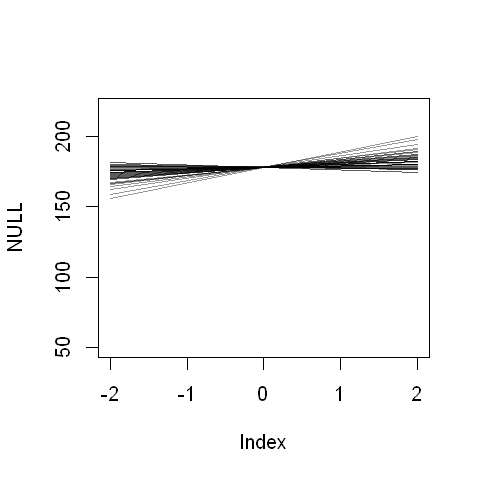

In [192]:
library(rethinking)
data(Howell1)
d <- Howell1
d$weight_s <- ( d$weight - mean(d$weight) )/sd(d$weight)
d$weight_s2 <- d$weight_s^2
m4.5 <- quap(
alist(
height ~ dnorm( mu , sigma ) ,
mu <- a + b1*weight_s + b2*weight_s2 ,
a ~ dnorm( 178 , 20 ) ,
b1 ~ dlnorm( 0 , 1 ) ,
b2 ~ dnorm( 0 , 1 ) ,
sigma ~ dunif( 0 , 50 )
) ,
data=d )

set.seed(10)
prior <- extract.prior( m4.5 )
mu <- link( m4.5 , post=prior , data=list( a=c(178,178), weight_s=c(-3,3), weight_s2=c(-3,3)))
plot( NULL , xlim=c(-2,2) , ylim=c(50,220) )
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) )

In [196]:
set.seed(45)
prior <- extract.prior( m4.5 )
precis(prior)

,mean,sd,5.5%,94.5%,histogram
a,177.60867247,20.7249835,144.1785056,211.421234,<U+2581><U+2581><U+2583><U+2587><U+2587><U+2582><U+2581><U+2581>
b1,1.61236478,1.8754510,0.1867143,4.433442,<U+2587><U+2582><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581>
b2,-0.05036862,0.9688063,-1.6422983,1.447121,<U+2581><U+2581><U+2581><U+2582><U+2583><U+2585><U+2587><U+2587><U+2585><U+2583><U+2581><U+2581><U+2581>
sigma,25.14432248,14.5856372,2.5161320,47.371388,<U+2587><U+2587><U+2585><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587>


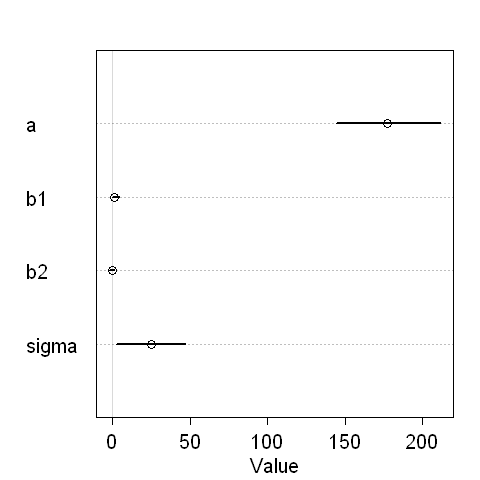

In [195]:
plot(precis(prior))

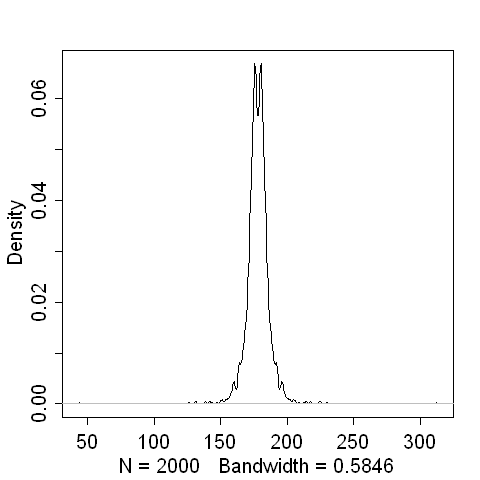

In [191]:
w_seq <- seq( from=min(d$weight_s) , to=max(d$weight_s) , length.out=50 )
w2_seq <- w_seq^2
mu <- link( m4.5 , post=prior ,
data=list( weight_s=w_seq , weight_s2=w2_seq ) )

In [ ]:
# curve(dnorm(x , 178 , 20 ) , from=100 , to=250)
# curve(dunif(x,min = 2, max = 50), from=0 , to=60)
# curve(dlnorm(x,meanlog = 0, sdlog = 1), from=0 , to=2)

sig <- runif(n = 10000, min = 0, max = 1)
beta2 <- rlnorm(n = 10000, meanlog = 0, sdlog = 0.000025)
beta1 <- rlnorm(n = 10000, meanlog = 0, sdlog = 0.000025)
alpha <- rnorm(n = 10000, mean = 178, sd = 0.000025)
x1 <- seq(to = 0, from = 1000, length.out = 10000)
mu <- alpha + beta1*x1 + beta2*(x1^2)
h <- rnorm(n = 10000, mean = mu , sd = sig)
#dens(h, xlim=range(0,1000000))
dens(mu, xlim=range(0,1000000))

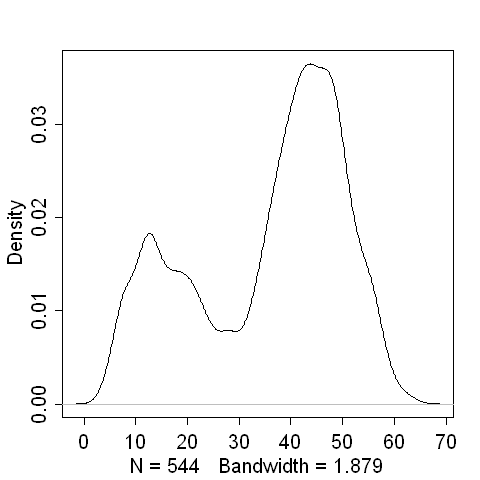

In [70]:
dens(d$weight)

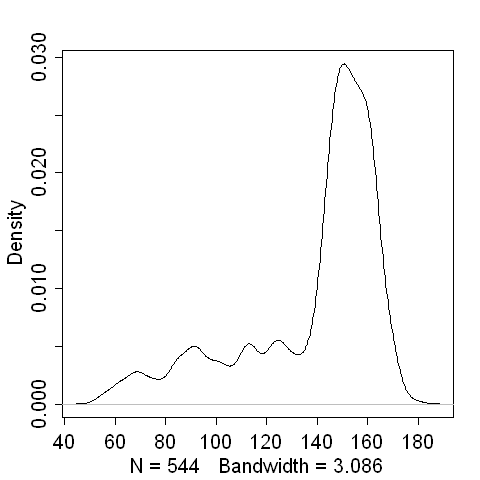

In [71]:
dens(d$height)

In [72]:
mean(mu)

[1] 334027.9

[1] 1.24363

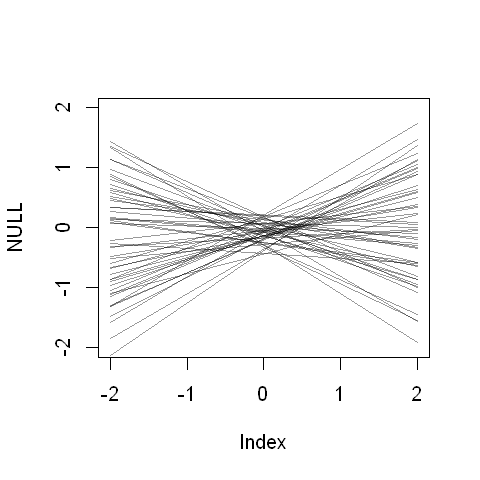

In [85]:
## R code 5.1
# load data and copy
library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce

# standardize variables
d$A <- scale( d$MedianAgeMarriage )
d$D <- scale( d$Divorce )

## R code 5.2
sd( d$MedianAgeMarriage )

## R code 5.3
m5.1 <- quap(
    alist(
        D ~ dnorm( mu , sigma ) ,
        mu <- a + bA * A ,
        a ~ dnorm( 0 , 0.2 ) ,
        bA ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data = d )

## R code 5.4
set.seed(10)
prior <- extract.prior( m5.1 )
mu <- link( m5.1 , post=prior , data=list( A=c(-2,2) ) )
plot( NULL , xlim=c(-2,2) , ylim=c(-2,2) )
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) )

In [ ]:
## above model 
model.1 <- quap(
    alist(
        D ~ dnorm( mu , sigma ) ,
        mu <- a + b1 * x + b2 * (x^2),
        a ~ dnorm( 178 , 1 ) ,
        b1 ~ dlnorm( 0 , 0.5 ) ,
        b2 ~ dlnorm( 0 , 0.5 ) ,
        sigma ~ dunif( 0, 0.005 )
    ) , data = list(x=x1, D=h ), start=list(x=178,D=178))

In [23]:
## R code 5.3
model.1 <- quap(
    alist(
        D ~ dnorm( mu , sigma ) ,
        mu <- a + b1 * x + b2 * (x^2),
        a ~ dnorm( 178 , 1 ) ,
        b1 ~ dlnorm( 0 , 0.5 ) ,
        b2 ~ dlnorm( 0 , 0.5 ) ,
        sigma ~ dunif( 0, 0.005 )
    ) , data = list(x=x1, D=h ), start=list(x=178,D=178))

ERROR: Error in quap(alist(D ~ dnorm(mu, sigma), mu <- a + b1 * x + b2 * (x^2), : non-finite finite-difference value [6]
Start values for parameters may be too far from MAP.
Try better priors or use explicit start values.
If you sampled random start values, just trying again may work.
Start values used in this attempt:
x = 178
D = 178
a = 177.215090503859
b1 = 1.61901072140391
b2 = 0.842026000590819
sigma = 0.000314911988098174


In [9]:
model.1

ERROR: Error in eval(expr, envir, enclos): object 'model.1' not found


In [ ]:
## R code 5.4
set.seed(10)
prior <- extract.prior( m5.1 )
mu <- link( m5.1 , post=prior , data=list( A=c(-2,2) ) )
plot( NULL , xlim=c(-2,2) , ylim=c(-2,2) )
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) )

In [ ]:
# h ~ Norm(mu, sig)
# mu <- alpha + beta1*x1 + beta2*x1^2
# alpha ~ Norm(178,20)
# beta1 ~ Log-Norm(0,1)
# beta2 ~ Log-Norm(0,1)
# sig ~ Unif(0,50)

In [ ]:
# STAN generate fake data

In [1]:
library(rstan)

Warning message:
"package 'rstan' was built under R version 3.3.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.2"Loading required package: StanHeaders
Warning message:
"package 'StanHeaders' was built under R version 3.3.2"rstan (Version 2.13.2, packaged: 2016-12-18 07:04:42 UTC, GitRev: 5fa1e80eb817)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


In [4]:
stancode <- "
// saved as categorical_model.stan
data {
  int N;
  int P; // number of categories to be estimated
  int y[N]; // outcomes
  int<lower = 0, upper = 1> run_estimation; // a switch to evaluate the likelihood
  real<lower = 0> prior_sd; // standard deviation of the prior on theta
}
parameters {
  vector[P-1] theta_raw;
}
transformed parameters {
  vector[P] theta;
  theta[1] = 0.0;
  theta[2:P] = theta_raw;
}
model {
  // prior
  theta_raw ~ normal(0, prior_sd);
  
  // likelihood, which we only evaluate conditionally
  if(run_estimation==1){
    y ~ categorical(softmax(theta));
  }
}
generated quantities {
  vector[N] y_sim;
  for(i in 1:N) {
    y_sim[i] = categorical_rng(softmax(theta));
  }
}
"

In [5]:
# compiled_model <- stan_model("categorical_model.stan")
compiled_model <- stan_model(model_code = stancode)

sim_out <- sampling(compiled_model, data = list(N = 1000, 
                                                P = 5, 
                                                # Y should be real but fake data if we're simulating
                                                # new Y
                                                y = sample(1:2, 1000, replace = T), 
                                                run_estimation = 0,
                                                prior_sd = 100))

library(dplyr)

fake_data_matrix  <- sim_out %>% 
  as.data.frame %>% 
  select(contains("y_sim"))

summary_tbl <- apply(fake_data_matrix[1:5,], 1, summary)

In file included from C:/Users/hvill/Documents/R/win-library/3.3/BH/include/boost/config.hpp:39:0,
                 from C:/Users/hvill/Documents/R/win-library/3.3/BH/include/boost/math/tools/config.hpp:13,
                 from C:/Users/hvill/Documents/R/win-library/3.3/StanHeaders/include/stan/math/rev/core/var.hpp:7,
                 from C:/Users/hvill/Documents/R/win-library/3.3/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5,
                 from C:/Users/hvill/Documents/R/win-library/3.3/StanHeaders/include/stan/math/rev/core.hpp:12,
                 from C:/Users/hvill/Documents/R/win-library/3.3/StanHeaders/include/stan/math/rev/mat.hpp:4,
                 from C:/Users/hvill/Documents/R/win-library/3.3/StanHeaders/include/stan/math.hpp:4,
                 from C:/Users/hvill/Documents/R/win-library/3.3/StanHeaders/include/src/stan/model/model_header.hpp:4,
                 from file3cc5315b04.cpp:8:
C:/Users/hvill/Documents/R/win-library/3.3/BH/include/boost/confi

In [6]:
summary_tbl

,1,2,3,4,5
Min.,3,2,2,3.000,3.000
1st Qu.,3,2,2,3.000,3.000
Median,3,2,2,3.000,3.000
Mean,3,2,2,3.091,3.008
3rd Qu.,3,2,2,3.000,3.000
Max.,3,2,2,4.000,5.000
